In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constants
import scipy.special as special
from matplotlib import rc as rc
%matplotlib inline
import math as math

In [2]:
plt.style.use("bmh")
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (8,6),
    'xtick.minor.visible': True,
    'ytick.minor.visible': True})
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':12})
# rc('text', usetex=True)

In [3]:
%autoreload 2
import dualpy as dp
def myseed(x, name):
    return dp.seed(x, name)

# Do a fairly kinematic calculation

In [4]:
tv = np.linspace(0,60,61)
uv = 10.0
av = 5.0

t = myseed(tv, "t")
# t = tv
u = myseed(uv, "u")
# u = uv
a = myseed(av, "a")
# a = av

In [5]:
print(t.jacobians)

{'t': Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<Unitless>/d<Unitless> = <Unitless>
data is (61,)}


In [6]:
# t = dp.seed(tv, "t")
# t = t.to(units.min)
# u = u.to(units.imperial.mile/units.hour)
# j = t.jacobians["t"]
# jv = j.diagonal()[0]
# print (f"Seed value has become {jv}")
# print (f"Units are {j.dependent_unit} by {j.independent_unit}")

In [7]:
s = u*t + 0.5*a*t**2
v = u + a*t

In [8]:
print (t)
print (t.jacobians["t"])

Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<Unitless>/d<Unitless> = <Unitless>
data is (61,)


In [9]:
print (s)
print (s.jacobians["t"])

Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<Unitless>/d<Unitless> = <Unitless>
data is (61,)


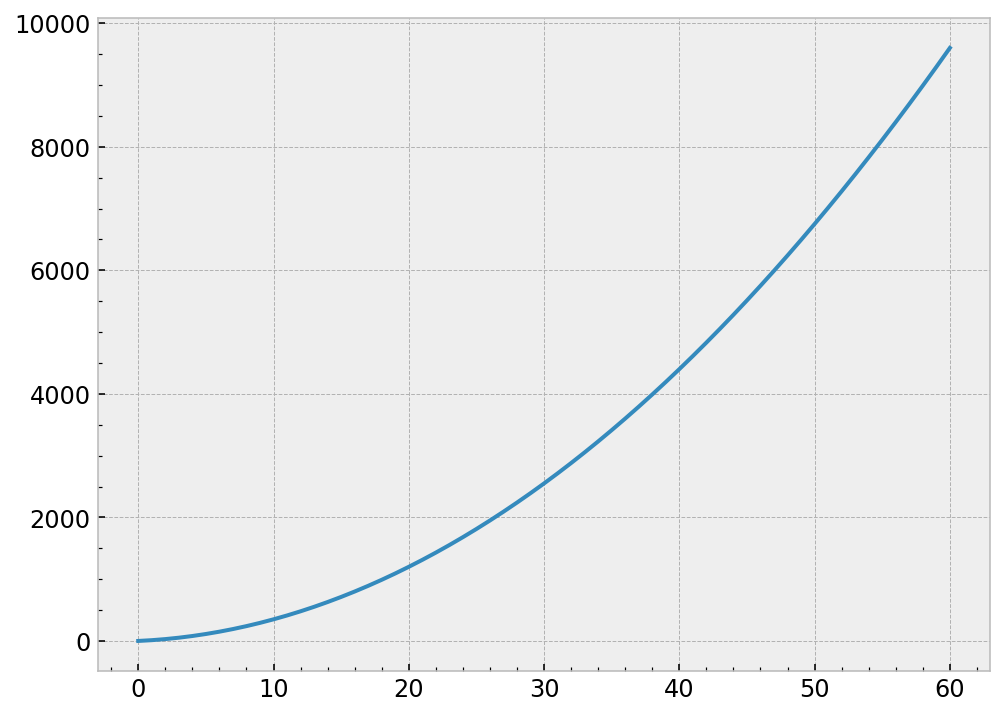

In [10]:
plt.plot(t,s)
plt.show()

## Now some oscillation / trigonometry stuff

In [11]:
theta = 30.0
theta = myseed(theta,"theta")
s = np.sin(theta)
j = s.jacobians["theta"].extract_diagonal()
print (f"sin is {s}, ds/dtheta={j}")

ValueError: Unsupported unit type <class 'dualpy.duals._Unitless'>

In [ ]:
tv = np.linspace(0,50,501)*units.s
omegav = 0.1*constants.pi*2 << (units.rad/units.s)
av = 10.0*units.m

In [ ]:
t = myseed(tv,"t")
print(t.jacobians['t'])
# t = t.to(units.minute)
# t = tv
omega = myseed(omegav, "omega")
# omega = omegav
a = myseed(av,"a")
# a = a.to(units.cm)
# a = av

In [ ]:
phase = omega*t
print (f"Phase has units of {phase.unit}")
x = a*np.sin(phase)

In [ ]:
xa = x.jacobians["a"]
sa = a.jacobians["a"]
print (sa.independent_shape)
print (xa.independent_shape)

In [ ]:
v = x.jacobians["t"].extract_diagonal()
print (f"v[0] = {v[0]}")
print (v.unit)
v = v.to(units.m/units.s)
x = x.to(units.m)

In [ ]:
plt.plot(t,x, label='$x$')
plt.plot(t,v, label='$\partial x/\partial t$')
print (x.jacobians["t"].shape)
dxda = x.jacobians["a"].todensearray()
plt.plot(t,dxda, label='$\partial x/\partial a$')
dxdomega = x.jacobians["omega"].todensearray()
plt.plot(t,dxdomega/100, label='$\partial x/\partial\omega/100$')
plt.legend()
plt.show()
print (v.unit)

In [ ]:
for name, j in x.jacobians.items():
    print (f"{name} is in {j.dependent_unit} by {j.independent_unit}")
        #values = np.array(j.data) << j.unit
        #print (f"{name}={values}")

In [ ]:
xV = 0.5 << units.dimensionless_unscaled
x = myseed(xV,"x")
print (np.arcsin(x).to(units.deg))

In [ ]:
def func(x): return np.sqrt(x)
xV = np.linspace(1,10,201) << units.dimensionless_unscaled
x = myseed(xV, "x")
y = func(x)
jA = y.jacobians["x"].extract_diagonal()

In [ ]:
dx = 1e-9*xV[-1]
jN = (func(xV+dx)-func(xV))/dx

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x,y)
ax1.plot(x,jA)
ax1.plot(x,jN)
ax2.plot(x,100.0*(jA-jN)/jA)
plt.show()